<a href="https://colab.research.google.com/github/ValenciaPinto/real-time-driver-attention-monitoring-system/blob/main/AMS_PRIMARY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from PIL import Image
import kagglehub
import shutil
from tqdm import tqdm
import matplotlib.pyplot as plt
from PIL import Image
import random

In [2]:
# Download the dataset
path = kagglehub.dataset_download("jatintopakar2005/driver-attention-monitoring-2")
print("Dataset downloaded successfully!")
print("Path to dataset files:", path)

# Analyze dataset structure
base_path = os.path.join(path, 'train_data2')

# List all categories
categories = os.listdir(base_path)
print("Dataset Categories:", categories)

100%|██████████| 3.06G/3.06G [00:36<00:00, 89.1MB/s]

Extracting files...


Dataset downloaded successfully!
Path to dataset files: /root/.cache/kagglehub/datasets/jatintopakar2005/driver-attention-monitoring-2/versions/1
Dataset Categories: ['cigeratte', 'natural', 'drowsy', 'phone', 'distracted']


Displaying random samples from each category:


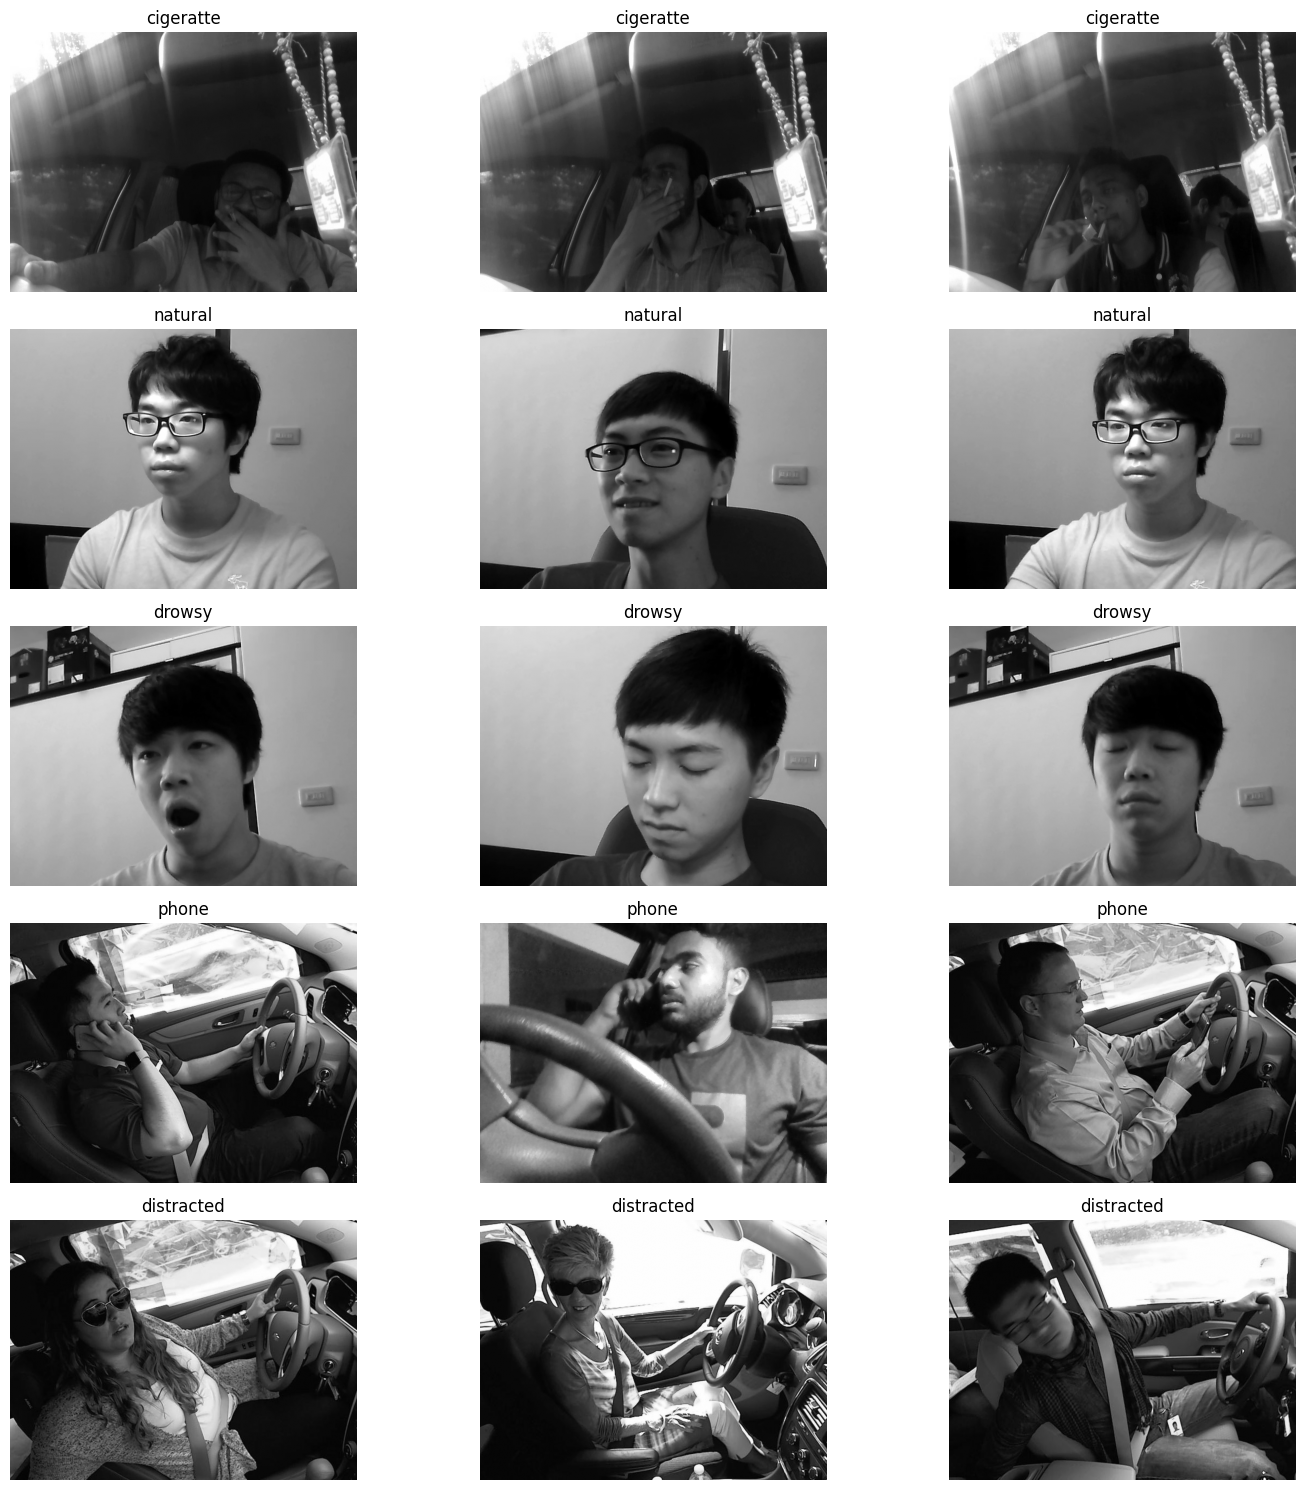


Starting dataset split...

Processing category: cigeratte
Copying 371 images to training set...


100%|██████████| 371/371 [00:00<00:00, 2161.46it/s]


Copying 160 images to testing set...


100%|██████████| 160/160 [00:00<00:00, 2045.33it/s]



Processing category: natural
Copying 3091 images to training set...


100%|██████████| 3091/3091 [00:03<00:00, 915.78it/s]


Copying 1326 images to testing set...


100%|██████████| 1326/1326 [00:01<00:00, 833.77it/s]



Processing category: drowsy
Copying 2685 images to training set...


100%|██████████| 2685/2685 [00:00<00:00, 3106.86it/s]


Copying 1151 images to testing set...


100%|██████████| 1151/1151 [00:00<00:00, 2910.59it/s]



Processing category: phone
Copying 3175 images to training set...


100%|██████████| 3175/3175 [00:03<00:00, 844.18it/s] 


Copying 1362 images to testing set...


100%|██████████| 1362/1362 [00:00<00:00, 1406.41it/s]



Processing category: distracted
Copying 1792 images to training set...


100%|██████████| 1792/1792 [00:04<00:00, 414.14it/s]


Copying 768 images to testing set...


100%|██████████| 768/768 [00:01<00:00, 429.34it/s]



Dataset successfully split into training and testing sets!

--- Dataset Split Verification ---

Contents of 'train' set:
  - cigeratte: 371 images
  - natural: 3091 images
  - drowsy: 2685 images
  - phone: 3175 images
  - distracted: 1792 images
  Total images in train set: 11114

Contents of 'test' set:
  - cigeratte: 160 images
  - natural: 1326 images
  - drowsy: 1151 images
  - phone: 1362 images
  - distracted: 768 images
  Total images in test set: 4767


In [3]:
# Visualize random grayscale images from each category
print("Displaying random samples from each category:")
images_per_category = 3
plt.figure(figsize=(15, len(categories) * 3))

img_count = 1
for category in categories:
    try:
        category_path = os.path.join(base_path, category)
        image_files = os.listdir(category_path)
        sample_files = random.sample(image_files, images_per_category)

        for file in sample_files:
            img_path = os.path.join(category_path, file)
            img = Image.open(img_path).convert('L') # Open and convert to grayscale

            plt.subplot(len(categories), images_per_category, img_count)
            plt.imshow(img, cmap='gray')
            plt.title(f"{category}")
            plt.axis('off')
            img_count += 1
    except Exception as e:
        print(f"Could not process category {category}: {e}")

plt.tight_layout()
plt.show()

# --- Dataset Splitting ---

print("\nStarting dataset split...")
source_dir = base_path
base_dir = "DriverAttentionDataset"

# Clean up the old directory if it exists
if os.path.exists(base_dir):
    shutil.rmtree(base_dir)
    print(f"Cleaned old directory: '{base_dir}'")

# Define training and testing directories
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Create the necessary folder structure
for category in categories:
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(test_dir, category), exist_ok=True)

# Set the split ratio
train_ratio = 0.7

# Process each category
for category in categories:
    print(f"\nProcessing category: {category}")
    category_path = os.path.join(source_dir, category)
    images = [img for img in os.listdir(category_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
    random.shuffle(images)

    # Determine the split index
    train_count = int(len(images) * train_ratio)
    train_images = images[:train_count]
    test_images = images[train_count:]

    # Copy training images with a progress bar
    print(f"Copying {len(train_images)} images to training set...")
    for img in tqdm(train_images):
        src = os.path.join(category_path, img)
        dest = os.path.join(train_dir, category, img)
        shutil.copyfile(src, dest)

    # Copy testing images with a progress bar
    print(f"Copying {len(test_images)} images to testing set...")
    for img in tqdm(test_images):
        src = os.path.join(category_path, img)
        dest = os.path.join(test_dir, category, img)
        shutil.copyfile(src, dest)

print("\nDataset successfully split into training and testing sets!")

# Verify the split by printing the counts
print("\n--- Dataset Split Verification ---")
for split in ['train', 'test']:
    print(f"\nContents of '{split}' set:")
    total_images = 0
    for category in categories:
        folder_path = os.path.join(base_dir, split, category)
        count = len(os.listdir(folder_path))
        total_images += count
        print(f"  - {category}: {count} images")
    print(f"  Total images in {split} set: {total_images}")

DNN model files not found. Relying on cascade classifiers.
Processing a sample image from the 'train' set...
Image: shahidcar1426.jpg (Category: cigeratte)
Driver face detected using: Cascade.


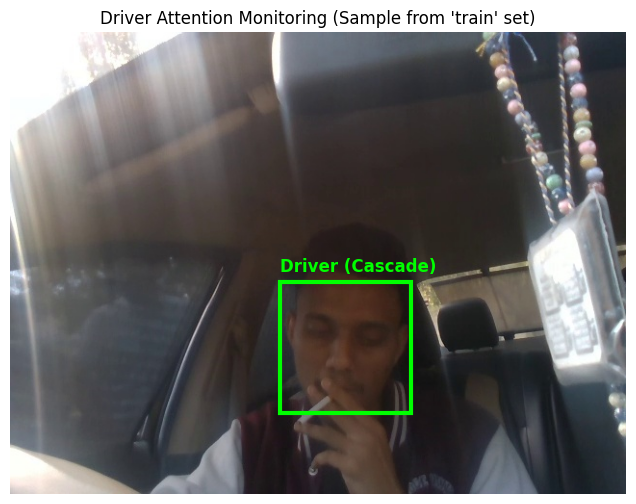

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random

# Define the data directories created in the previous step
base_dir = "DriverAttentionDataset"
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
categories = os.listdir(train_dir)

class DriverAttentionMonitor:
    """
    A more robust system that enhances brightness on failure to detect a face.
    """
    def __init__(self, target_size=(224, 224)):
        self.target_size = target_size
        self.face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
        self.profile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_profileface.xml')
        self.net = self._load_dnn_model()

    def _load_dnn_model(self):
        """Loads the DNN face detection model if available."""
        model_file = "opencv_face_detector_uint8.pb"
        config_file = "opencv_face_detector.pbtxt"
        if os.path.exists(model_file) and os.path.exists(config_file):
            print("DNN face detection model found and loaded.")
            return cv2.dnn.readNetFromTensorflow(model_file, config_file)
        else:
            print("DNN model files not found. Relying on cascade classifiers.")
            return None

    def _detect_faces_on_image(self, image_to_process):
        """Helper function to run the full detection pipeline on a given image."""
        gray = cv2.cvtColor(image_to_process, cv2.COLOR_BGR2GRAY)

        # Try DNN first
        faces = self._dnn_face_detection(image_to_process)
        detection_method = 'DNN'

        # Fallback to Cascade if DNN fails
        if len(faces) == 0:
            faces = self._cascade_face_detection(gray)
            detection_method = 'Cascade'

        driver_face = self._select_driver_face(faces, gray.shape)
        return driver_face, detection_method

    def _enhance_brightness(self, img, alpha=1.5, beta=10):
        """Increases the brightness and contrast of an image."""
        return cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

    def _dnn_face_detection(self, image, confidence_threshold=0.5):
        """Detects faces using a Deep Neural Network."""
        if self.net is None: return []
        h, w = image.shape[:2]
        blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300), [104, 117, 123])
        self.net.setInput(blob)
        detections = self.net.forward()
        faces = [
            [int(detections[0, 0, i, 3] * w), int(detections[0, 0, i, 4] * h),
             int(detections[0, 0, i, 5] * w) - int(detections[0, 0, i, 3] * w),
             int(detections[0, 0, i, 6] * h) - int(detections[0, 0, i, 4] * h)]
            for i in range(detections.shape[2]) if detections[0, 0, i, 2] > confidence_threshold
        ]
        return np.array(faces)

    def _cascade_face_detection(self, gray_image):
        """Detects faces using Haar Cascade Classifiers."""
        faces = self.face_cascade.detectMultiScale(gray_image, 1.1, 4)
        if len(faces) == 0:
            faces = self.profile_cascade.detectMultiScale(gray_image, 1.1, 4)
        return faces

    def _select_driver_face(self, faces, image_shape):
        """Selects the most likely driver's face (largest one)."""
        if len(faces) == 0: return []
        return [max(faces, key=lambda f: f[2] * f[3])]

    def process_image(self, image_path):
        """
        Main pipeline to process an image. If no face is found, it enhances
        the image brightness and tries again.
        """
        img = cv2.imread(image_path)
        if img is None:
            return None, None, "Error"

        # --- First Attempt on Original Image ---
        driver_face, detection_method = self._detect_faces_on_image(img)
        image_for_display = img

        # --- Second Attempt on Brightened Image (if first failed) ---
        if len(driver_face) == 0:
            print("Initial detection failed. Trying again with enhanced brightness...")
            bright_img = self._enhance_brightness(img)

            # Re-run detection on the brightened image
            driver_face, detection_method = self._detect_faces_on_image(bright_img)

            # If successful, update the display image and method name
            if len(driver_face) > 0:
                image_for_display = bright_img
                detection_method += " + Brightness"

        return image_for_display, driver_face, detection_method

def demonstrate_system_on_split_data(data_directory, categories_list):
    """
    Selects a random image, processes it using the enhanced pipeline,
    and visualizes the result.
    """
    monitor = DriverAttentionMonitor()

    category = random.choice(categories_list)
    category_path = os.path.join(data_directory, category)
    image_file = random.choice(os.listdir(category_path))
    image_path = os.path.join(category_path, image_file)

    print(f"Processing a sample image from the '{os.path.basename(data_directory)}' set...")
    print(f"Image: {image_file} (Category: {category})")

    # The 'processed_image' will be the original OR the brightened one
    processed_image, driver_face, method = monitor.process_image(image_path)

    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))

    if len(driver_face) > 0:
        x, y, w, h = driver_face[0]
        rect = plt.Rectangle((x, y), w, h, fill=False, color='lime', linewidth=3)
        plt.gca().add_patch(rect)

        # The title will now indicate if brightness enhancement was used
        title_text = f'Driver ({method})'
        plt.text(x, y - 10, title_text, color='lime', fontsize=12, fontweight='bold')

        print(f"Driver face detected using: {method}.")
    else:
        print("No driver face was detected, even after enhancing brightness.")

    plt.title(f"Driver Attention Monitoring (Sample from '{os.path.basename(data_directory)}' set)")
    plt.axis('off')
    plt.show()

# --- Run the demonstration on the training set ---
demonstrate_system_on_split_data(train_dir, categories)

In [8]:
pip install retina-face matplotlib opencv-python



📂 Dataset: train
📸 Image: shahidcar1297.jpg (Category: cigeratte)


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: /root/.deepface/weights/retinaface.h5


25-09-15 09:12:28 - Directory /root/.deepface created
25-09-15 09:12:28 - Directory /root/.deepface/weights created
25-09-15 09:12:28 - retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5


100%|██████████| 119M/119M [00:00<00:00, 320MB/s] 


✅ Driver face detected using: RetinaFace


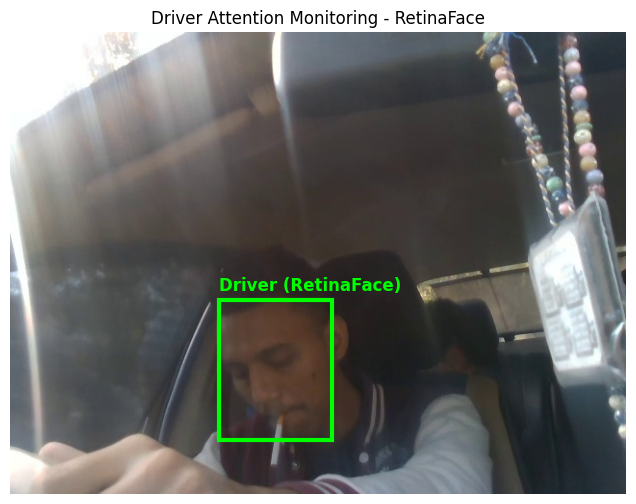


🔍 Testing on one image from each of the following categories:
drowsy, distracted, phone, cigeratte, natural

📂 Dataset: train
📸 Image: 002_noglasses_yawning_367_drowsy.jpg (Category: drowsy)
✅ Driver face detected using: RetinaFace


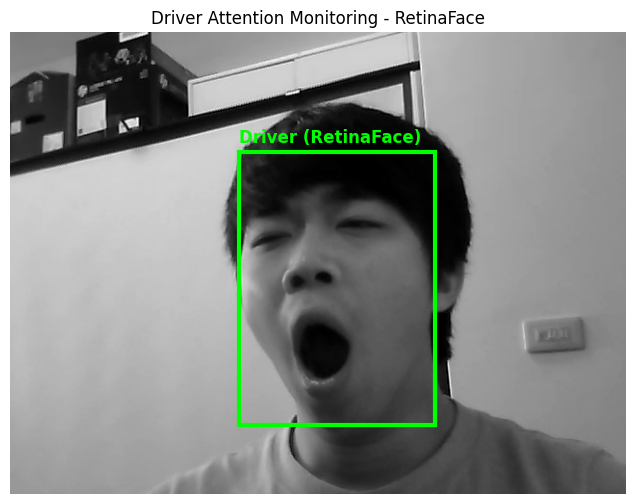


📂 Dataset: train
📸 Image: img_12869.jpg (Category: distracted)
✅ Driver face detected using: RetinaFace


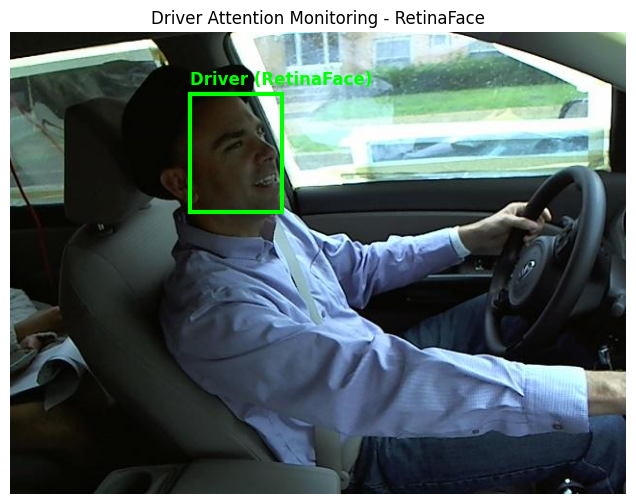


📂 Dataset: train
📸 Image: 1001-380-_jpg.rf.cd2fac1fe6ea38e41a90a09d7177fee3.jpg (Category: phone)
⚠️ Initial detection failed. Trying again with brightness enhancement...
❌ No driver face detected after retries.


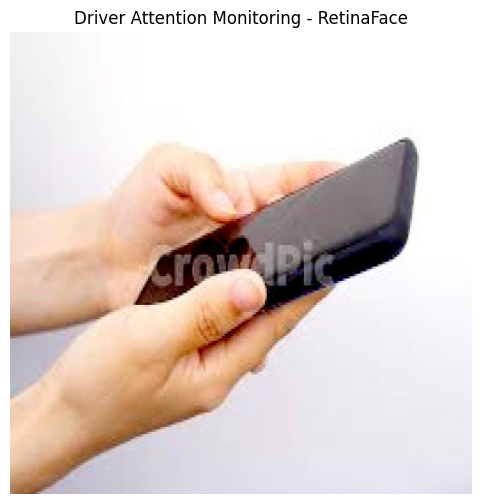


📂 Dataset: train
📸 Image: shahidcar1397.jpg (Category: cigeratte)
✅ Driver face detected using: RetinaFace


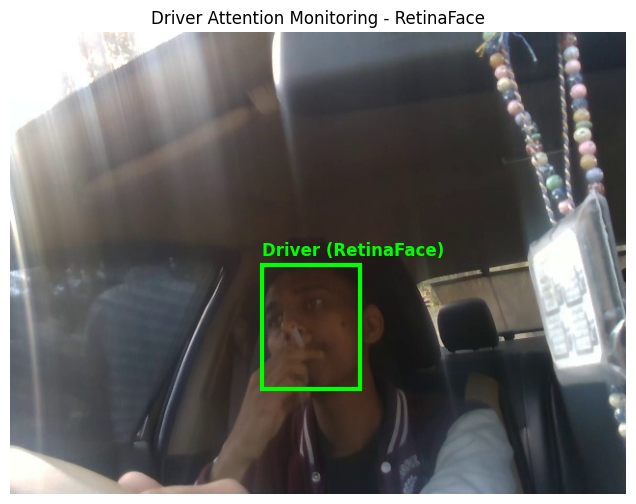


📂 Dataset: train
📸 Image: 001_noglasses_yawning_128_notdrowsy.jpg (Category: natural)
✅ Driver face detected using: RetinaFace


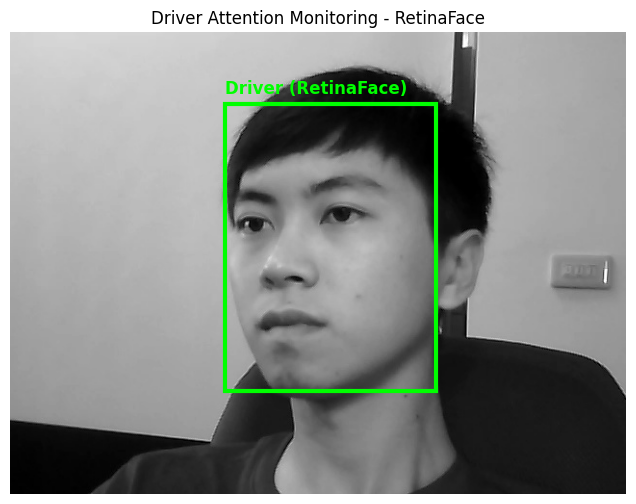

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from retinaface import RetinaFace

# Define your dataset directory
base_dir = "DriverAttentionDataset"
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
categories = os.listdir(train_dir)

class DriverAttentionMonitor:
    """
    An enhanced Driver Attention Monitoring system using RetinaFace.
    """
    def __init__(self, target_size=(224, 224)):
        self.target_size = target_size  # You can use this if you later classify faces

    def _detect_faces_retinaface(self, image):
        """
        Uses RetinaFace to detect faces in the input image.
        Returns a list of bounding boxes: [x, y, w, h]
        """
        try:
            faces = RetinaFace.detect_faces(image)
            results = []
            for key in faces:
                x1, y1, x2, y2 = faces[key]['facial_area']
                w, h = x2 - x1, y2 - y1
                results.append([x1, y1, w, h])
            return np.array(results)
        except Exception as e:
            print("❌ RetinaFace detection failed:", e)
            return []

    def _enhance_brightness(self, img, alpha=1.5, beta=10):
        """Increases brightness and contrast."""
        return cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

    def _select_driver_face(self, faces):
        """Selects the largest detected face (assumed to be the driver)."""
        if len(faces) == 0:
            return []
        return [max(faces, key=lambda f: f[2] * f[3])]

    def process_image(self, image_path):
        """
        Processes an image, detects the driver face, retries with brightness enhancement if needed.
        """
        img = cv2.imread(image_path)
        if img is None:
            print("❌ Failed to load image:", image_path)
            return None, None, "Error"

        # First attempt
        driver_faces = self._detect_faces_retinaface(img)
        driver_face = self._select_driver_face(driver_faces)
        method = "RetinaFace"
        image_for_display = img

        # Retry with brightness enhancement if failed
        if len(driver_face) == 0:
            print("⚠️ Initial detection failed. Trying again with brightness enhancement...")
            bright_img = self._enhance_brightness(img)
            driver_faces = self._detect_faces_retinaface(bright_img)
            driver_face = self._select_driver_face(driver_faces)
            if len(driver_face) > 0:
                method += " + Brightness"
                image_for_display = bright_img

        return image_for_display, driver_face, method

def demonstrate_system_on_split_data(data_directory, categories_list):
    """
    Demonstrates face detection on a randomly selected image.
    """
    monitor = DriverAttentionMonitor()

    category = random.choice(categories_list)
    category_path = os.path.join(data_directory, category)
    image_file = random.choice(os.listdir(category_path))
    image_path = os.path.join(category_path, image_file)

    print(f"\n📂 Dataset: {os.path.basename(data_directory)}")
    print(f"📸 Image: {image_file} (Category: {category})")

    processed_image, driver_face, method = monitor.process_image(image_path)

    if processed_image is None:
        print("❌ Skipping visualization due to error.")
        return

    # Display results
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))

    if len(driver_face) > 0:
        x, y, w, h = driver_face[0]
        rect = plt.Rectangle((x, y), w, h, fill=False, color='lime', linewidth=3)
        plt.gca().add_patch(rect)
        plt.text(x, y - 10, f'Driver ({method})', color='lime', fontsize=12, fontweight='bold')
        print(f"✅ Driver face detected using: {method}")
    else:
        print("❌ No driver face detected after retries.")

    plt.title(f"Driver Attention Monitoring - {method}")
    plt.axis('off')
    plt.show()

# 🔁 Run the demo on training set
demonstrate_system_on_split_data(train_dir, categories)
# --- Test the system on five specific categories (one image each) ---
selected_categories = ['drowsy', 'distracted', 'phone', 'cigeratte', 'natural']

print("\n🔍 Testing on one image from each of the following categories:")
print(", ".join(selected_categories))

for cat in selected_categories:
    if cat in categories:
        demonstrate_system_on_split_data(train_dir, [cat])
    else:
        print(f"⚠️ Category '{cat}' not found in your dataset.")

